In [45]:
%matplotlib inline
import numpy as np
from numpy import array as arr
import seaborn as sns
import matplotlib.pyplot as plt

# Linear Regression

In this lab we explore fitting a linear regression to data using *ordinary least squares* (OLS).

We use simulated data for practice. The data $X$ are simulated as follows:

$Y = 0.1 X^3 + 0.5 X^2 + 10.2 X - 21 + \epsilon \;\;$ where $\epsilon \sim \mathcal{N}(0,5)$

In words, the dependent variable equals a third order polynomial (cubic) of the one-dimensional independent variable plus Gaussian noise. Below is the cubic $f$ and the function  *sim_data* that simulates the data:


In [46]:
def f(x): return 0.1*x**3 + 0.5*x**2 + 10.2*x - 21.

def sim_data(seed=0):
    np.random.seed(seed)
    min_x, max_x, stepsize = -10, 10, 0.1
    #independent var (does not have to be uniformly space in general):
    X = arr([np.arange(min_x, max_x, stepsize)]).T
    (N,_) = X.shape
    Y = f(X) + np.random.normal(0,5,size=np.shape(X)) #dependent var
    return X,Y

### Plotting the data
Let's simulate some data, $X,Y$ and plot it as a scatter. By convention, the response/dependent variable goes on the y-axis:

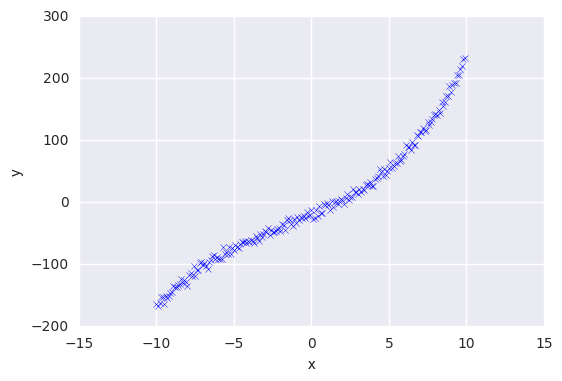

In [47]:
X,Y = sim_data()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(X,Y,marker='x')
plt.show()

### Adding an intercept column to the independent variables
We add a new column of ones to the independent array X that allows OLS to use an intercept/systematic bias.

In [48]:
(N,D) = X.shape
X1 = np.hstack((np.ones((N,1)), X))
print('X1 (first 10 rows):\n',X1[:10,:])

X1 (first 10 rows):
 [[  1.  -10. ]
 [  1.   -9.9]
 [  1.   -9.8]
 [  1.   -9.7]
 [  1.   -9.6]
 [  1.   -9.5]
 [  1.   -9.4]
 [  1.   -9.3]
 [  1.   -9.2]
 [  1.   -9.1]]


### Ordinary Least Squares

Recall the basic assumption of linear regression:
${\bf Y} = {\bf X}^\top \beta + \epsilon$ where $\epsilon$ is drawn i.i.d. from a normal distribution. 

OLS fits this model by minimizing the sum of squared errors in linear regression. Unlike many inferentialalgorithms that you will encounter, its solution is closed-form (has a single step that can be written down explicitly in maths).

OLS calculates the unknown coefficients $\beta$ from data as follows:

$\beta = ({\bf X}^\top {\bf X})^{-1} {\bf X}^\top {\bf Y}$

We next calculate $\beta$ using this equation. 
However, be aware that it is better to avoid matrix inversions in practice, as it can be a numerically unstable operation. In this case, the premultiplier to ${\bf Y}$ is known as the Moore-Penrose *psuedoinverse* of ${\bf X}$:

${\bf M} = ({\bf X}^\top {\bf X})^{-1} {\bf X}^\top$

and there is a function in the ```numpy``` package that can calculate it:

In [49]:
M = np.linalg.pinv(X1)

### Task: calculating the coefficients

Use the pseudoinverse ${\bf M}$ to calculate the coefficients $\beta$ in the code cell below. Then use $\beta$ to calculate the predictions of linear regression given the matrix ```X1```.

In [50]:
beta = np.dot(M, Y)
Y_prediction = np.dot(X1, beta)

coefficients:
 [[ -4.18277421]
 [ 16.10346643]]


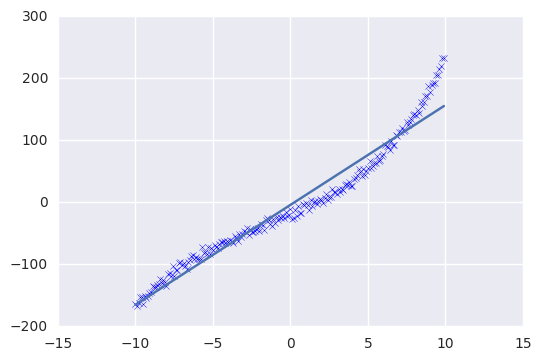

In [51]:
#now plot the original data and the linear regression fit:
print('coefficients:\n',beta)
plt.scatter(X1[:,1],Y,marker='x')
plt.plot(X1[:,1],Y_prediction)

In [52]:
beta_lst, sum_residuals, rank, s = np.linalg.lstsq(X1, Y)
print('coefficients using np.linalg.lstsq:\n',beta_lst)

coefficients using np.linalg.lstsq:
 [[ -4.18277421]
 [ 16.10346643]]


### Residuals
The *residuals* of a regression fit are the actual Y minus the predicted Y. This is the number being minimized by OLS:

In [53]:
residuals = (Y - Y_prediction)
SR = residuals**2
print('sum of squared residuals', SR.sum())

sum of squared residuals 88573.9202438


It is often useful to plot the residuals as a histogram:

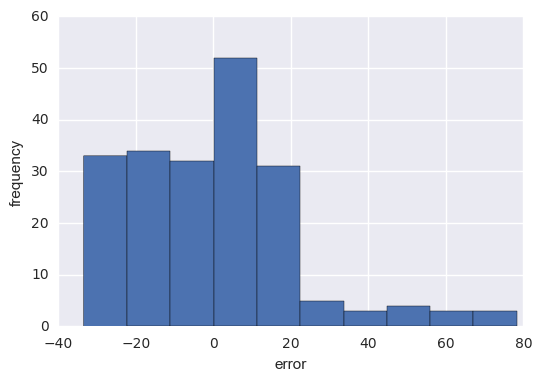

In [54]:
plt.hist(residuals)
plt.xlabel('error')
plt.ylabel('frequency')

Notice the shape of this histogram: there are many more residuals less than zero than there are residuals greater than zero. This is interesting because the linear regression model assumes that the error is drawn from a Gaussian with zero mean. Something is going here (discussed in the next section of this lab).

### Explained variance
As covered in the videos for this day, we can also calculate the variance explained by the model as proportion of the total variance of the dependent variable:

In [1]:
total_var = Y.var()
explained_var = total_var - (residuals**2).sum()/float(N)
r2 = explained_var / total_var
print('total_var, explained_var, r-squared:\n', total_var, explained_var, r2)

NameError: name 'Y' is not defined

### Plotting error independence
Finally, in this section we look at the residual error as a function of the independent variable. In the model specification, the errors should be *independently* distributed, but this cart below shows that this is not the case:

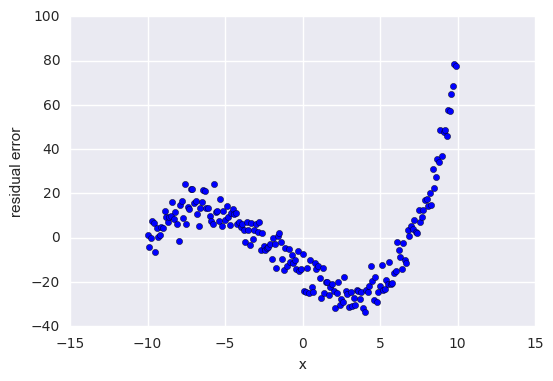

In [56]:
plt.scatter(X,residuals)
plt.xlabel('x')
plt.ylabel('residual error')

## Model Mismatch and Higher Order Basis Functions

The above linear fit to obviously non-linear data is an example of model mismatch. It leads to the data violating some of the assumptions of linear regression, namely that the errors are independently and identically distributed to a Gaussian. 

Sometimes we know the source of model mismatch and are able to extend the model to better fit the data. In general, this is often not possible. However, in this case, we know exactly the source of model mismatch and can get a better fit with linear regression if we add quadratic ($x^2$) and cubic ($x^3$) basis functions to the independent variable. 

### Task:
Add quadratic and cubic functions of the data X below, following the same steps of analysis as above and see if you can obtain a better fit. 

Do you notice anything about the shape of the error histogram this time? Why does it differ to the shape of the error histogram for linear regression using only the zero-th and first order powers of X?



In [57]:
X2 = np.hstack((X1,X**2,X**3))
print('X2',X2[:5,:])
beta_cubic, sum_residuals, rank, s = np.linalg.lstsq(X2, Y)
print('beta_cubic',beta_cubic)
Y_prediction_cubic = np.dot(X2, beta_cubic)
err_cubic = (Y - Y_prediction_cubic)
explained_var_cubic = total_var - (err_cubic**2).sum()/float(N)
r2_cubic = explained_var_cubic / total_var
print('total_var, explained_var, r-squared:\n', total_var, explained_var_cubic, r2_cubic)

X2 [[    1.      -10.      100.    -1000.   ]
 [    1.       -9.9      98.01   -970.299]
 [    1.       -9.8      96.04   -941.192]
 [    1.       -9.7      94.09   -912.673]
 [    1.       -9.6      92.16   -884.736]]
beta_cubic [[-20.7761912 ]
 [ 10.4741928 ]
 [  0.50353154]
 [  0.09465414]]
total_var, explained_var, r-squared:
 9086.70786456 9061.368355 0.997211365223


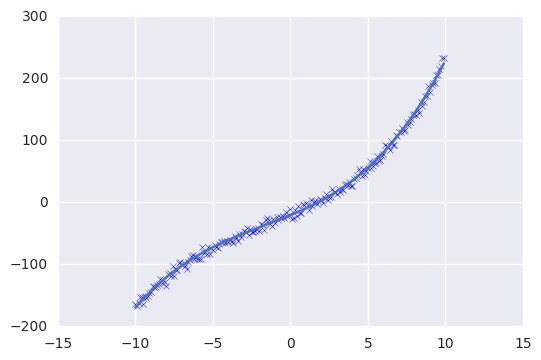

In [58]:
plt.scatter(X,Y,marker='x')
plt.plot(X,Y_prediction_cubic)

(array([  1.,   3.,  21.,  32.,  38.,  36.,  31.,  20.,  14.,   4.]),
 array([-13.75831657, -11.12272526,  -8.48713396,  -5.85154266,
         -3.21595136,  -0.58036005,   2.05523125,   4.69082255,
          7.32641385,   9.96200516,  12.59759646]),
 <a list of 10 Patch objects>)

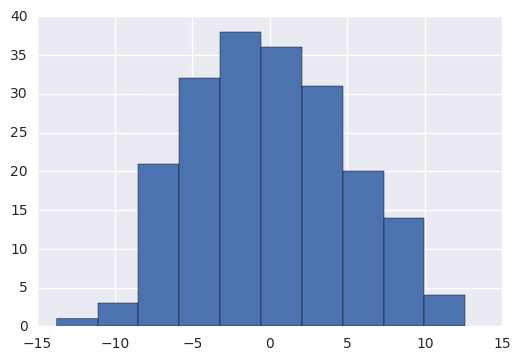

In [59]:
plt.hist(err_cubic)

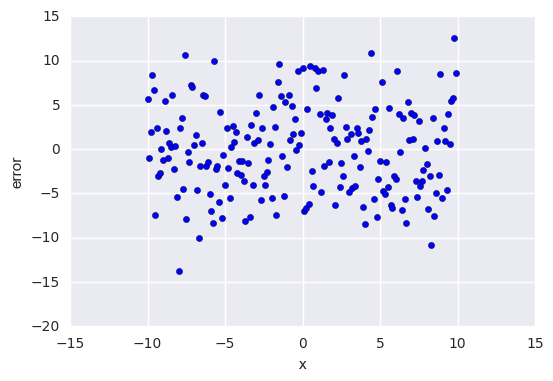

In [60]:
plt.scatter(X,err_cubic)
plt.xlabel('x')
plt.ylabel('error')